In [2]:
from sympy import *

In [3]:
#Definindo as variáveis
s, t, L, Ia, If, R, Vcc, Vd = symbols('s t L Ia If R Vcc Vd')

# Parte 1:Conversor de tensão do tipo Buck

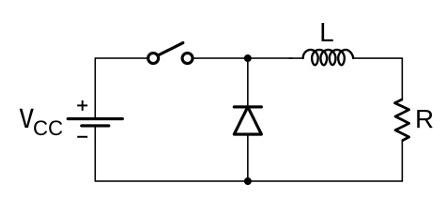

<br>

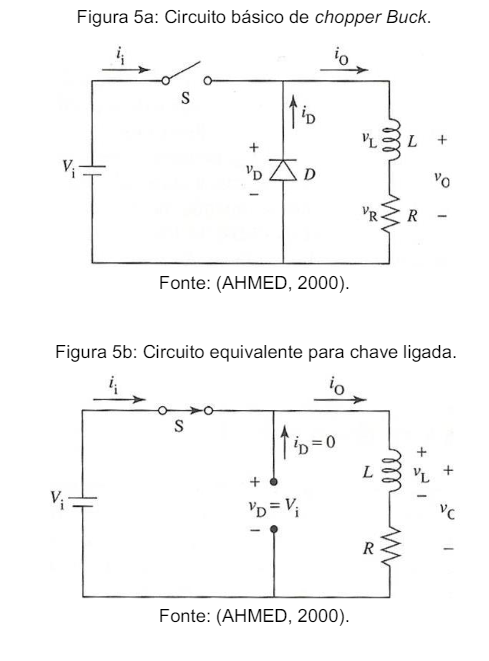

<br>

Quando a chave está fechada, é fácil ver que o diodo deve estar no modo de operação de polarização reversa. Quando a chave está aberta, contudo, o modo de operação do diodo dependerá das condições iniciais e dos valores dos parâmetros envolvidos. Com um valor inicial de corrente no indutor suficientemente alto, entretanto, o diodo estará no modo de polarização direta.

In [4]:
#Equações simbólicas no dominio da frequência
eq_chave_fechada = Eq(Vcc/s - L*s*If - If*R, 0)
eq_chave_aberta = Eq(Vd/s + L*s*Ia + Ia*R,0)

eq_chave_fechada, eq_chave_aberta

(Eq(-If*L*s - If*R + Vcc/s, 0), Eq(Ia*L*s + Ia*R + Vd/s, 0))

In [5]:
solucao_I_fechada = linsolve([eq_chave_fechada], If)
solucao_I_aberta = linsolve([eq_chave_aberta], Ia)

solucao_I_fechada, solucao_I_aberta

({(Vcc/(L*s**2 + R*s),)}, {(-Vd/(L*s**2 + R*s),)})

In [6]:
# Expressões para VR(s) = I*R
VRf_s = solucao_I_fechada.args[0][0] * R
VRa_s = solucao_I_aberta.args[0][0] * R

VRf_s, VRa_s

(R*Vcc/(L*s**2 + R*s), -R*Vd/(L*s**2 + R*s))

In [7]:
# Simplificar as expressões e depois expandir em frações parciais
VRf_s_simplified = simplify(VRf_s)
VRa_s_simplified = simplify(VRa_s)

# Tentativa de expansão em frações parciais
VRf_s_fractioned = apart(VRf_s_simplified, s)
VRa_s_fractioned = apart(VRa_s_simplified, s)

VRf_s_fractioned, VRa_s_fractioned

(-L*Vcc/(L*s + R) + Vcc/s, L*Vd/(L*s + R) - Vd/s)

A função residue é uma parte do SymPy que tenta encontrar o coeficiente do termo:
$\frac{1}{s-p}$
na expansão de uma função complexa, que é o resíduo da função nesse polo.


Referência na documentação para calcular os residuos:
<br>
https://lidavidm.github.io/sympy/modules/series/series.html?highlight=residue#sympy.series.residues.residue
<br>
https://docs.sympy.org/latest/modules/series/series.html



In [8]:
VRf_s_fractioned.as_ordered_terms(),VRa_s_fractioned.as_ordered_terms()

([-L*Vcc/(L*s + R), Vcc/s], [L*Vd/(L*s + R), -Vd/s])

In [9]:
# Calcular os residuos
# Polos e residuos para Vrf(s)
polos_residuos_VRf = [(p, residue(VRf_s_fractioned, s, p)) for p in VRf_s_fractioned.as_ordered_terms()]

# Polos e resíduos para VRa(s)
polos_residuos_VRa = [(p, residue(VRa_s_fractioned, s, p)) for p in VRa_s_fractioned.as_ordered_terms()]

polos_residuos_VRf, polos_residuos_VRa

([(-L*Vcc/(L*s + R), 0), (Vcc/s, 0)], [(L*Vd/(L*s + R), 0), (-Vd/s, 0)])

In [10]:
# Calculando a transformada inversa de Laplace apenas para VRf(s)
vRf_t = inverse_laplace_transform(VRf_s_fractioned, s, t)
vRa_t = inverse_laplace_transform(VRa_s_fractioned, s, t)

vRf_t,vRa_t

(Vcc*Heaviside(t) - Vcc*exp(-R*t/L)*Heaviside(t),
 -Vd*Heaviside(t) + Vd*exp(-R*t/L)*Heaviside(t))

# Parte 2: Análise no tempo

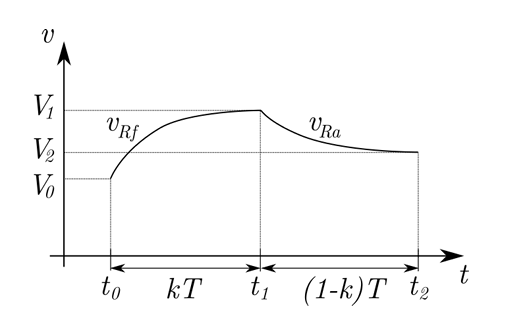


$$\text{Devido à continuidade da corrente no indutor, temos que:}$$
$$\lim_{t \to t_{1^-}} v_{Rf}(t) = \lim_{t \to t_{1^+}} v_{Ra}(t) = V_1$$
$$\text{onde o primeiro limite é pela esquerda, e o segundo, pela direita. De forma similar,}$$
$$\lim_{t \to t_{2^-}} v_{Ra}(t) = \lim_{t \to t_{2^+}} v_{Rf}(t) = V_2$$
$$\text{Observe que as expressões determinadas na seção anterior para } v_{Rf}(t) \text{ e } v_{Ra}(t) \text{ assumem que } t_0 = 0, \text{ de modo que você deve considerar que } t_1 = kT, t_2 = (1-k)T \text{ e } t_{1^+} = t_{2^+}= 0.$$
$$\text{Observe ainda que a corrente inicial do indutor no caso da chave fechada é } \frac{V_0}{R}, \text{ enquanto que, quando a chave abre, é } \frac{V_1}{R}.$$


In [30]:
# Definição dos símbolos adicionais
t, T, k, L, R, V0, Vcc, Vd0 = symbols('t T k L R V0 Vcc Vd0')
V, V1, V2, I0 = symbols('V V1 V2 I0 ')

# Definição de t1 baseada no período e no ciclo de trabalho
t1 = k * T
t2 = (1 - k) * T


# Substituindo a corrente inicial do indutor na expressão de vRf(t) quando a chave está fechada
vRf_t_subs = vRf_t.subs(I0, V0/R)

# Substituindo a corrente quando a chave abre na expressão de vRa(t)
vRa_t_subs = vRa_t.subs(I0, V1/R)

# Calculando os limites em t1 e t2 com as substituições aplicadas
vRf_t1_minor_limit = limit(vRf_t_subs, t, t1, '-')
vRa_t1_plus_limit = limit(vRa_t_subs, t, t1, '+')

vRa_t2_minor_limit = limit(vRa_t_subs, t, t2, '-')
vRf_t2_plus_limit = limit(vRf_t_subs, t, t2, '+')

# Estabelecer que V1 é igual a ambos os limites
eq_V1 = Eq(V1, vRf_t1_minor_limit)
eq_V2 = Eq(V2, vRa_t2_minor_limit)



eq_V1, eq_V2

(Eq(V1, (Vcc*exp(R*T*k/L)*Heaviside(T*k) - Vcc*Heaviside(T*k))*exp(-R*T*k/L)),
 Eq(V2, (-Vd*exp(R*T/L)*Heaviside(-T*k + T) + Vd*exp(R*T*k/L)*Heaviside(-T*k + T))*exp(-R*T/L)))

# Parte 3: Análise em regime permanente

In [36]:
# V0 é igual a V2 e V = V1 - V0
eq_V0 = Eq(V0, V2)
eq_V = Eq(V, V1 - V0)

# Resolvendo as equações para V0 e V
sistema_equacoes = [eq_V0, eq_V, eq_V1, eq_V2]
variaveis = [V0, V, V1, V2]
solucao = linsolve(sistema_equacoes, variaveis)
solucao

{(-Vd*Heaviside(-T*k + T) + Vd*exp(-R*T/L)*exp(R*T*k/L)*Heaviside(-T*k + T), Vcc*Heaviside(T*k) - Vcc*exp(-R*T*k/L)*Heaviside(T*k) + Vd*Heaviside(-T*k + T) - Vd*exp(-R*T/L)*exp(R*T*k/L)*Heaviside(-T*k + T), Vcc*Heaviside(T*k) - Vcc*exp(-R*T*k/L)*Heaviside(T*k), -Vd*Heaviside(-T*k + T) + Vd*exp(-R*T/L)*exp(R*T*k/L)*Heaviside(-T*k + T))}

In [38]:
if solucao:
    solucao = list(solucao)  
    V0_solucao, V_solucao, V1_solucao, V2_solucao = solucao[0]  # Acessando a primeira (e geralmente única) tupla

    # Imprimir as soluções
    print("Solução para V0:", V0_solucao)
    print("Solução para V:", V_solucao)
    print("Solução para V1:", V1_solucao)
    print("Solução para V2:", V2_solucao)
else:
    print("Não foram encontradas soluções.")

Solução para V0: -Vd*Heaviside(-T*k + T) + Vd*exp(-R*T/L)*exp(R*T*k/L)*Heaviside(-T*k + T)
Solução para V: Vcc*Heaviside(T*k) - Vcc*exp(-R*T*k/L)*Heaviside(T*k) + Vd*Heaviside(-T*k + T) - Vd*exp(-R*T/L)*exp(R*T*k/L)*Heaviside(-T*k + T)
Solução para V1: Vcc*Heaviside(T*k) - Vcc*exp(-R*T*k/L)*Heaviside(T*k)
Solução para V2: -Vd*Heaviside(-T*k + T) + Vd*exp(-R*T/L)*exp(R*T*k/L)*Heaviside(-T*k + T)


In [48]:
# Aplicando a expansão em série em torno de T = 0
V0_series = series(V0_solucao, T, 0, 2)  # Expande até a primeira ordem (linear)
V_series = series(V_solucao, T, 0, 2)    

# Extraindo os termos da série (normalmente o termo constante e o coeficiente de T)
V0_linear = V0_series.removeO()  # Remove os termos de ordem superior
V_linear = V_series.removeO()    

# Valores de V0 e V quando T -> 0
V0_at_T0 = V0_linear.subs(T, 0)
V_at_T0 = V_linear.subs(T, 0)

V0_series, V0_at_T0

(T*(R*Vd*k/(2*L) - R*Vd/(2*L)) + O(T**2), 0)

In [53]:
# Define a condição de V ser 0.001 * Vcc
condicao = Eq(V, 0.001 * Vcc)
eq_condicao = condicao.subs(V, V_linear)
sol_L = solve(eq_condicao,L)

sol_L

[500.0*R*T*(Vcc*k - Vd*k + Vd)/Vcc]

In [54]:
import numpy as np

# Definição dos valores
Rs = [5, 1]  # Valores de R
frequencies = [10e3, 50e3]  # Frequências em Hz

# Cálculo de L para cada combinação de R e f
results = {}
for R in Rs:
    for f in frequencies:
        L = -R / (f * np.log(0.5))
        results[(R, f)] = L

results


{(5, 10000.0): 0.0007213475204444818,
 (5, 50000.0): 0.00014426950408889634,
 (1, 10000.0): 0.00014426950408889634,
 (1, 50000.0): 2.885390081777927e-05}